In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

InletConditions(F_A0=1075, F_S0=750, F_B0=1275, v_0=250.0, C_A0=4.3, C_B0=5.1, C_S0=3.0, F=3100)

In [32]:
def C_A(T):
    F = 250
    V = 4000
    C_A0 = 4.3
    C_B0 = 5.1

    k_1 = 4e14*np.exp(-1.28e5/8.315/T)
    
    _f = lambda C_A: F/V*(C_A0-C_A)-k_1*C_A*(C_A+C_B0-C_A0)
    _C_A = fsolve(_f, [4.3])
    return _C_A[0]

def C_S(T):
    F = 250
    V = 4000
    C_S0 = 3

    k_2 = 1e84*np.exp(-8e5/8.315/T)

    _f = lambda C_S: F/V*(C_S0-C_S)-k_2*C_S
    _C_S = fsolve(_f, [3])
    return _C_S[0]

def R(T):
    F = 250
    V = 4000
    T_0 = 410
    U = 14656
    A = 5.3
    T_c = 373
    V = 4000
    rho = 12.4
    C_P = 254

    return -(F/V*(T_0-T)-(U*A*(T-T_c))/(V*rho*C_P))

def G(T):
    H_1 = -45400
    H_2 = -3.2e5
    C_A0 = 4.3
    C_B0 = 5.1
    rho = 12.4
    C_P = 254

    k_1 = 4e14*np.exp(-1.28e5/8.315/T)
    k_2 = 1e84*np.exp(-8e5/8.315/T)

    g = (-H_1*k_1*C_A(T)*(C_A(T)+C_B0-C_A0)-H_2*k_2*C_S(T))/(rho*C_P)

    return g

def dT(T):
    return G(T) - R(T)


In [35]:
T_S = fsolve(dT, [460])[0]

T_S

460.32878421135734

In [36]:
C_A(T_S)

0.21086752735908276

In [37]:
C_S(T_S)

2.999991854637766

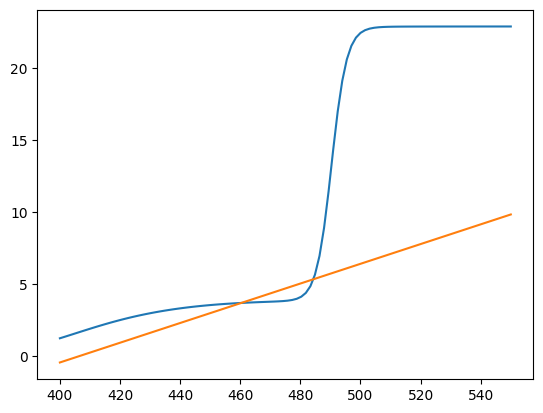

In [31]:
T_range = np.linspace(400, 550, 100)

g = np.zeros(T_range.shape[0])

for i, val in enumerate(T_range):
    g[i] = G(val)

plt.plot(T_range, g)
plt.plot(T_range, R(T_range))